# Tissue Classification
---

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
seed = 42

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Print gpu name
if torch.cuda.is_available(): 
    print(torch.cuda.get_device_name(device))
    print(torch.cuda.get_device_properties(device='cuda'))

Using device: cuda
NVIDIA GeForce RTX 3090
_CudaDeviceProperties(name='NVIDIA GeForce RTX 3090', major=8, minor=6, total_memory=24257MB, multi_processor_count=82, uuid=e7c31494-7e41-d1c4-a803-f28dc77117f5, L2_cache_size=6MB)


Unzip the data

In [ ]:
data_path = 'data/'

train_folder = 'NCT-CRC-HE-100K'
test_folder = 'CRC-VAL-HE-7K'

train_zip = data_path + train_folder + ".zip"
test_zip = data_path + test_folder + ".zip"

In [ ]:
# Unzip data
import zipfile

with zipfile.ZipFile(train_zip, 'r') as zip_ref:
    zip_ref.extractall(data_path)

with zipfile.ZipFile(test_zip, 'r') as zip_ref:
    zip_ref.extractall(data_path)

Change image format

Labels: ['ADI', 'BACK', 'DEB', 'LYM', 'MUC', 'MUS', 'NORM', 'STR', 'TUM']
Number of images: 7180


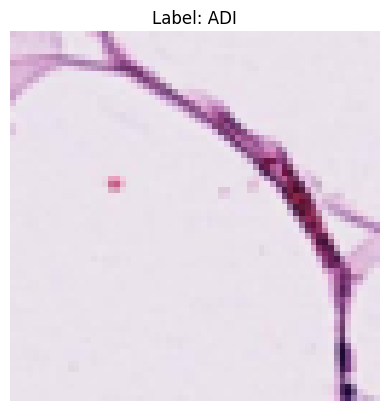

In [ ]:
# Change format from .tif to .jpg
import os
from PIL import Image

for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.endswith('.tif'):
            img = Image.open(os.path.join(root, file))
            img.save(os.path.join(root, file.replace('.tif', '.jpg')))
            os.remove(os.path.join(root, file))